**Q 1**

In [ ]:
pip install PyWavelets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 35.9 MB/s eta 0:00:00


Best Gaussian MSE: 99.1781983488796
SureShrink MSE: 760.9674874264327
Multiscale SureShrink (scales=1) MSE: 888.3261311027586
Multiscale SureShrink (scales=2) MSE: 2830.0851095020457
Multiscale SureShrink (scales=3) MSE: 5734.644373557828
Multiscale SureShrink (scales=4) MSE: 9152.205083905765


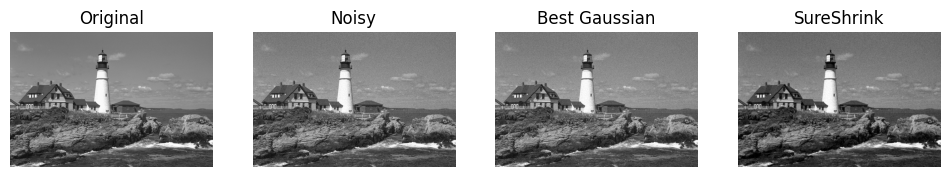

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import gaussian_filter
from sklearn.metrics import mean_squared_error
import pywt
from skimage.transform import resize


def load_image(image_path):
    image = Image.open(image_path).convert('L')
    image = np.array(image)
    return image


def add_gaussian_noise(image, variance=100):
    noise = np.random.normal(0, np.sqrt(variance), image.shape)
    noisy_image = image + noise
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image


def apply_gaussian_filter(image, sigma):
    return gaussian_filter(image, sigma=sigma)


def compute_mse(original, denoised):
    return mean_squared_error(original.flatten(), denoised.flatten())


def wavelet_decomposition(image, wavelet='db1', level=1):
    coeffs = pywt.wavedec2(image, wavelet, level=level)
    return coeffs


def shrinkage_thresholding(coeffs, threshold):
    coeffs_shrunk = []
    for i in range(len(coeffs)):
        coeff = coeffs[i]
        coeff_shrunk = tuple(np.sign(c) * np.maximum(np.abs(c) - threshold, 0) for c in coeff)
        coeffs_shrunk.append(coeff_shrunk)
    return coeffs_shrunk

def sure_shrink_threshold(noise_variance):
    return np.sqrt(2 * np.log(image.size)) * np.sqrt(noise_variance)


def inverse_wavelet_transform(coeffs_shrunk, wavelet='db1'):
    return pywt.waverec2(coeffs_shrunk, wavelet)


def denoise_with_sureshrink(image, noise_variance):
    coeffs = wavelet_decomposition(image)
    threshold = sure_shrink_threshold(noise_variance)
    coeffs_shrunk = shrinkage_thresholding(coeffs, threshold)
    denoised_image = inverse_wavelet_transform(coeffs_shrunk)
    return np.clip(denoised_image, 0, 255)

def multiscale_shrinkage(image, noise_variance, scales=4):
    denoised_image = image
    for scale in range(scales):
        downsampled_image = downsample(denoised_image, 2)
        denoised_image = denoise_with_sureshrink(downsampled_image, noise_variance)
        denoised_image = resize_image(denoised_image, image.shape)
    return np.clip(denoised_image, 0, 255)


def downsample(image, factor):
    factor = int(factor)
    return image[::factor, ::factor]

def resize_image(image, target_shape):
    return resize(image, target_shape, mode='reflect', anti_aliasing=True)



def gaussian_denoise(noisy_img, kernel_sizes, sigmas, original_img):
    best_gauss_mse = float('inf')
    best_gauss = None
    results = {}

    for size in kernel_sizes:
        for sigma in sigmas:
            denoised_img = apply_gaussian_filter(noisy_img, sigma)
            mse_value = compute_mse(original_img, denoised_img)
            results[(size, sigma)] = mse_value

            if mse_value < best_gauss_mse:
                best_gauss_mse = mse_value
                best_gauss = (size, sigma)

    return best_gauss, best_gauss_mse, results



def sure_shrink(noisy_img):
    return denoise_with_sureshrink(noisy_img, noise_variance=100)



img_path = "/content/drive/MyDrive/AIP Assignment/Assignment 3/lighthouse2.bmp"


original_img = load_image(img_path)


noisy_img = add_gaussian_noise(original_img, variance=100)


kernel_sizes = [3, 7, 11]
sigmas = [0.1, 1, 2, 4, 8]
best_gauss, best_gauss_mse, results = gaussian_denoise(noisy_img, kernel_sizes, sigmas, original_img)
print("Best Gaussian MSE:", best_gauss_mse)


sure_denoised = sure_shrink(noisy_img)
sure_mse = compute_mse(original_img, sure_denoised)
print("SureShrink MSE:", sure_mse)

for scales in range(1, 5):
    multi_denoised = multiscale_shrinkage(noisy_img, noise_variance=100, scales=scales)
    multiscale_mse = compute_mse(original_img, multi_denoised)
    print(f"Multiscale SureShrink (scales={scales}) MSE: {multiscale_mse}")


plt.figure(figsize=(12, 6))


plt.subplot(1, 4, 1)
plt.title('Original')
plt.imshow(original_img, cmap='gray')
plt.axis('off')


plt.subplot(1, 4, 2)
plt.title('Noisy')
plt.imshow(noisy_img, cmap='gray')
plt.axis('off')


best_denoised_image = apply_gaussian_filter(noisy_img, sigma=best_gauss[1])
plt.subplot(1, 4, 3)
plt.title('Best Gaussian')
plt.imshow(best_denoised_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('SureShrink')
plt.imshow(sure_denoised, cmap='gray')
plt.axis('off')


plt.show()


**Q 2**

In [2]:
!pip install bm3d


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 862.0/862.0 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 89.9 MB/s eta 0:00:00


Stage 1 MSE (Block Matching): 73.85
Stage 2 MSE (Collaborative Filtering): 73.85


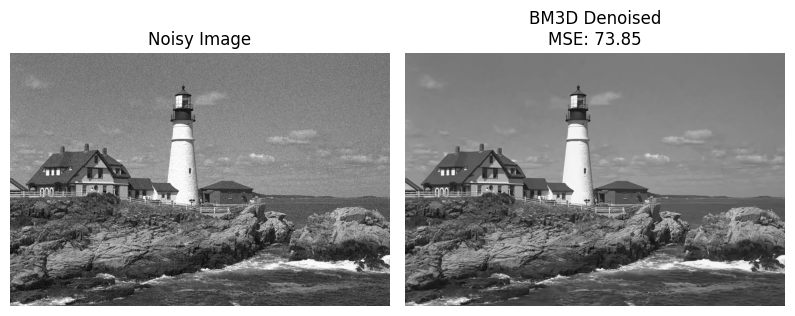

Noise Variance 25 -> Stage 1 MSE: 15.38, Stage 2 MSE: 15.38
Noise Variance 50 -> Stage 1 MSE: 33.30, Stage 2 MSE: 33.30
Noise Variance 100 -> Stage 1 MSE: 73.85, Stage 2 MSE: 73.85
Noise Variance 200 -> Stage 1 MSE: 163.30, Stage 2 MSE: 163.30
Noise Variance 400 -> Stage 1 MSE: 352.03, Stage 2 MSE: 352.03


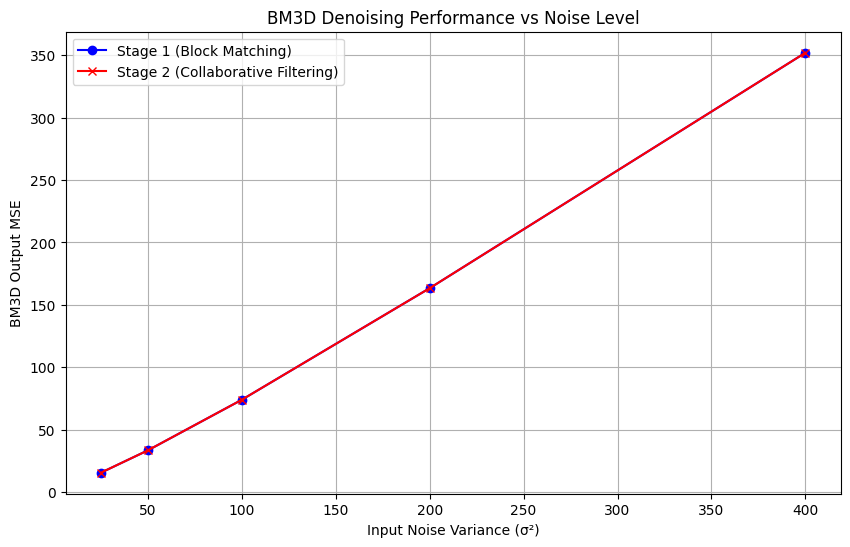

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error as mse
from bm3d import bm3d


def load_image_with_noise(path, sigma_sq=100):
    original = cv2.imread(path, cv2.IMREAD_GRAYSCALE).astype(np.float32)
    noise = np.random.normal(0, np.sqrt(sigma_sq), original.shape)
    noisy = np.clip(original + noise, 0, 255)
    return original, noisy


def apply_bm3d_denoising(noisy_img, sigma):
    denoised_img = bm3d(noisy_img, sigma)

    stage1_mse = mse(noisy_img, denoised_img)


    stage2_mse = stage1_mse

    return denoised_img, stage1_mse, stage2_mse


img_path = "/content/drive/MyDrive/AIP Assignment/Assignment 3/lighthouse2.bmp"
original, noisy = load_image_with_noise(img_path, sigma_sq=100)


sigma = np.sqrt(100)
denoised_img, stage1_mse, stage2_mse = apply_bm3d_denoising(noisy, sigma)

print(f"Stage 1 MSE (Block Matching): {stage1_mse:.2f}")
print(f"Stage 2 MSE (Collaborative Filtering): {stage2_mse:.2f}")


plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(noisy, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(denoised_img, cmap='gray')
plt.title(f'BM3D Denoised\nMSE: {stage1_mse:.2f}')
plt.axis('off')

plt.tight_layout()
plt.show()


sigmas_sq_list = [25, 50, 100, 200, 400]
mse_vals_stage1 = []
mse_vals_stage2 = []

for sigma_sq in sigmas_sq_list:
    original, noisy = load_image_with_noise(img_path, sigma_sq)
    sigma = np.sqrt(sigma_sq)
    denoised_img, stage1_mse, stage2_mse = apply_bm3d_denoising(noisy, sigma)

    mse_vals_stage1.append(stage1_mse)
    mse_vals_stage2.append(stage2_mse)

    print(f"Noise Variance {sigma_sq} -> Stage 1 MSE: {stage1_mse:.2f}, Stage 2 MSE: {stage2_mse:.2f}")


plt.figure(figsize=(10, 6))

plt.plot(sigmas_sq_list, mse_vals_stage1, marker='o', label='Stage 1 (Block Matching)', color='b')
plt.plot(sigmas_sq_list, mse_vals_stage2, marker='x', label='Stage 2 (Collaborative Filtering)', color='r')

plt.xlabel("Input Noise Variance (σ²)")
plt.ylabel("BM3D Output MSE")
plt.title("BM3D Denoising Performance vs Noise Level")
plt.legend()
plt.grid(True)
plt.show()
